### Exploratory Data Analysis

In [227]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVC


In [228]:
col_names = ['ID','Diagnosis','radius1','texture1','perimeter1','area1','smoothness1','compactness1','concavity1','concave_points1','symmetry1', 'fractal_dimension1',
             'radius2','texture2','perimeter2','area2','smoothness2','compactness2','concavity2','concave_points2','symmetry2', 'fractal_dimension2',
             'radius3','texture3','perimeter3','area3','smoothness3','compactness3','concavity3','concave_points3','symmetry3', 'fractal_dimension3'] # giving the column names according to ics uci archive

In [229]:
cancer_df = pd.read_csv('breast-cancer-wisconsin.csv', header=1, names=col_names) # reading the dataset and giving the column names
cancer_df.head() # showing the first five rows in the dataset

,ID,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,84300903.0,M,19.69,21.25,130.00,1203.0,0.10960,0.1599,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
1,84348301.0,M,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
2,84358402.0,M,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
3,843786.0,M,12.45,15.70,82.57,477.1,0.12780,0.1700,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
4,844359.0,M,18.25,19.98,119.60,1040.0,0.09463,0.1090,0.1127,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368


In [230]:
cancer_df.tail()

,ID,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
564,926682.0,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
565,926954.0,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
566,927241.0,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
567,92751.0,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039
568,92751.0,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [231]:
print(f'Total Number of Features: {len(col_names)}') # total features in the dataset

Total Number of Features: 32


In [232]:
cancer_df.info() #information about column, data type of the column, non null count and memory usage 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  566 non-null    float64
 1   Diagnosis           566 non-null    object 
 2   radius1             564 non-null    float64
 3   texture1            563 non-null    float64
 4   perimeter1          565 non-null    float64
 5   area1               564 non-null    float64
 6   smoothness1         566 non-null    float64
 7   compactness1        565 non-null    float64
 8   concavity1          565 non-null    float64
 9   concave_points1     561 non-null    float64
 10  symmetry1           566 non-null    float64
 11  fractal_dimension1  565 non-null    float64
 12  radius2             563 non-null    float64
 13  texture2            561 non-null    float64
 14  perimeter2          566 non-null    float64
 15  area2               563 non-null    float64
 16  smoothne

In [233]:
cancer_df.shape # Total number of rows and column

(569, 32)

In [234]:
cancer_df.describe() # summary of the dataset

,ID,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
count,5.660000e+02,564.000000,563.000000,565.000000,564.000000,566.000000,565.000000,565.000000,561.000000,566.000000,...,556.000000,548.000000,563.00000,565.000000,560.000000,565.000000,566.000000,563.000000,565.000000,556.000000
mean,3.021746e+07,14.084910,-242.883250,91.821965,653.139007,0.096293,0.104072,0.088341,-3.513236,0.187316,...,16.237725,25.755274,110.73222,894.079646,0.132431,0.253804,0.271402,0.114075,0.290053,0.083948
std,1.252984e+08,3.509242,445.745742,24.305152,351.740510,0.014164,0.052455,0.079382,59.598056,0.115188,...,4.821354,6.123586,59.23487,686.377057,0.022868,0.156881,0.208411,0.065593,0.061600,0.018142
min,8.670000e+03,6.981000,-999.000000,43.790000,143.500000,0.052630,0.019380,0.000000,-999.000000,0.000700,...,7.930000,12.020000,50.41000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692195e+05,11.687500,-999.000000,75.170000,420.175000,0.086380,0.064500,0.029480,0.019690,0.161900,...,13.010000,21.287500,84.13500,515.300000,0.116750,0.147200,0.114425,0.064530,0.250400,0.071270
50%,9.061570e+05,13.290000,17.000000,86.180000,546.350000,0.095895,0.092630,0.061260,0.033260,0.179150,...,14.940000,25.465000,97.67000,686.500000,0.131350,0.214100,0.226550,0.099750,0.282600,0.079900
75%,8.812869e+06,15.757500,21.015000,103.800000,782.625000,0.105300,0.130400,0.129300,0.073400,0.195675,...,18.602500,29.757500,126.50000,1084.000000,0.146000,0.339100,0.382400,0.161100,0.318400,0.092082
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,2.100000,...,36.040000,49.540000,910.00000,10056.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


C:\Users\kazia\AppData\Local\Temp\ipykernel_14560\3601198966.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Diagnosis', data=cancer_df, palette = "Set1").set(title = 'Diagnosis Counts') #Showing the number of nuclear diagnosis with M or B


[Text(0.5, 1.0, 'Diagnosis Counts')]

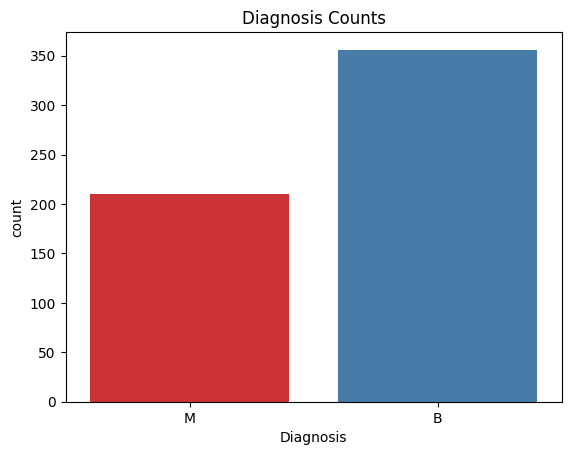

In [235]:
sns.countplot(x='Diagnosis', data=cancer_df, palette = "Set1").set(title = 'Diagnosis Counts') #Showing the number of nuclear diagnosis with M or B

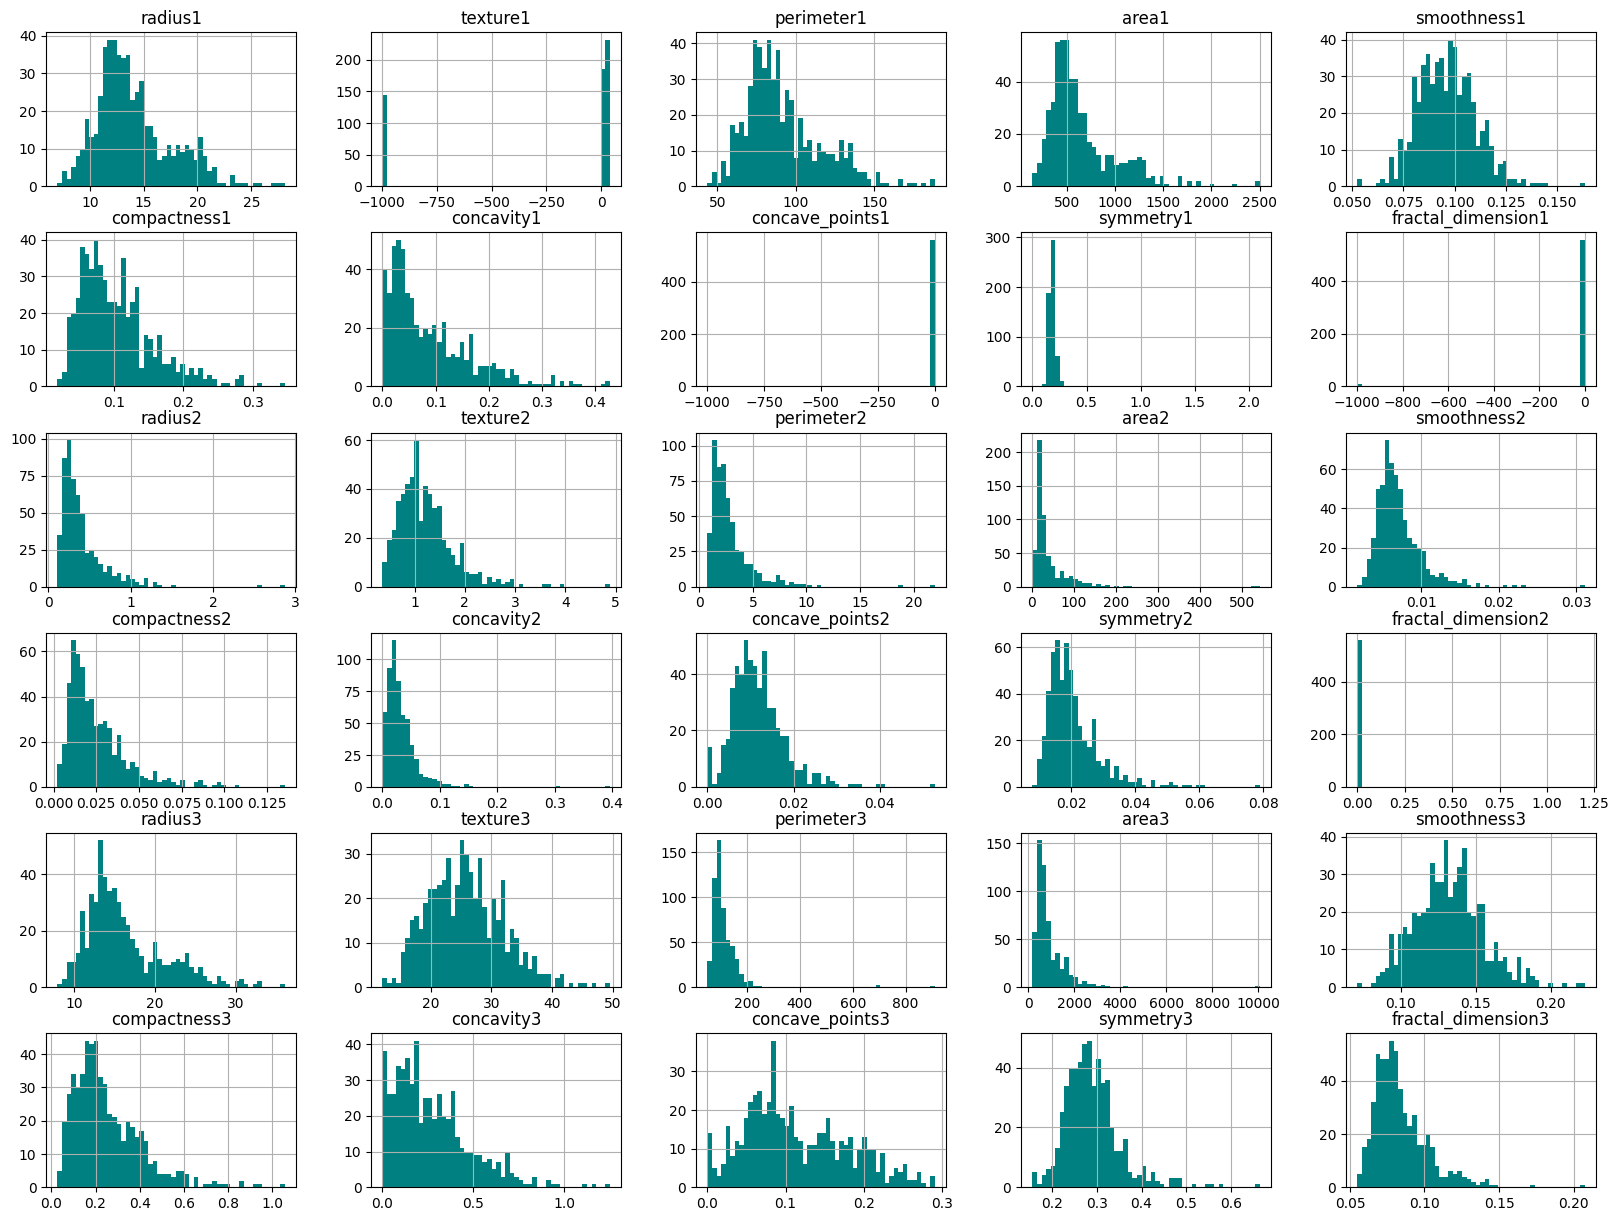

In [236]:
temp = cancer_df.columns[2:]
%matplotlib inline
cancer_df[temp].hist(bins=50,figsize=(20,15), color='teal')
plt.show()

C:\Users\kazia\AppData\Local\Temp\ipykernel_14560\574314705.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax = axes[i], x='Diagnosis', y=col_names[i+2], data=cancer_df , palette="Blues")
C:\Users\kazia\AppData\Local\Temp\ipykernel_14560\574314705.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax = axes[i], x='Diagnosis', y=col_names[i+2], data=cancer_df , palette="Blues")
C:\Users\kazia\AppData\Local\Temp\ipykernel_14560\574314705.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax = axes[i], x='Diagnosis', y=col_names[i+2], da

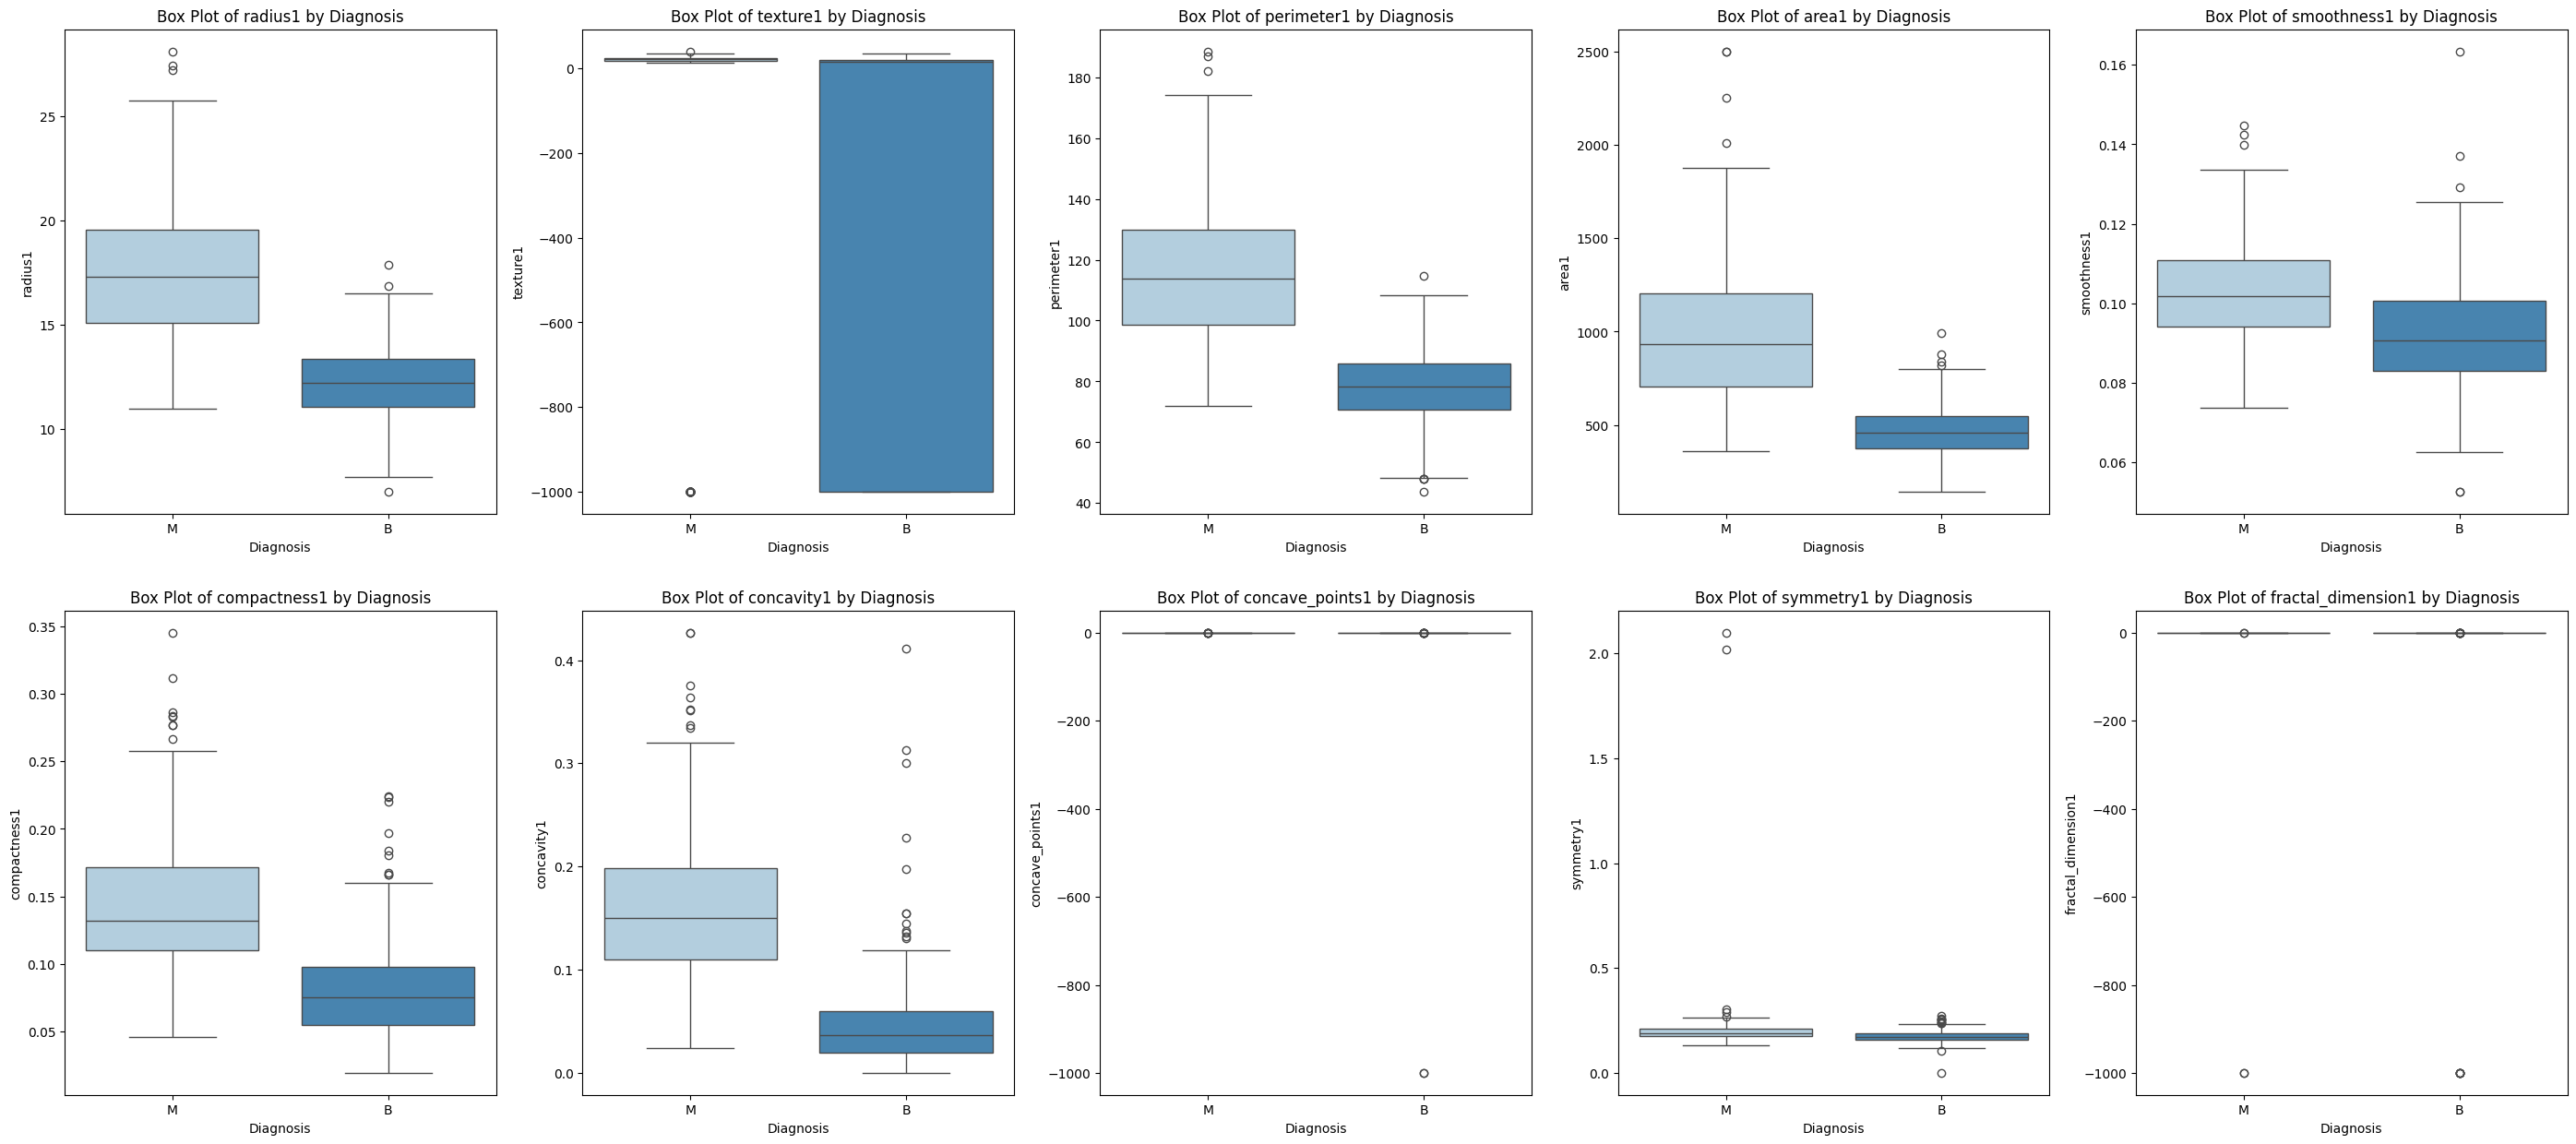

In [237]:
# Learnt from https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8
fig, axes = plt.subplots(2, 5, figsize=(35, 15)) # Creating a subplot of 2 rows and 5 columns
axes = axes.flatten() # converting 2d array to 1d array
for i in range(10):
    sns.boxplot(ax = axes[i], x='Diagnosis', y=col_names[i+2], data=cancer_df , palette="Blues")
    axes[i].set(title = f'Box Plot of {col_names[i+2]} by Diagnosis')


C:\Users\kazia\AppData\Local\Temp\ipykernel_14560\100289121.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax = axes[i], x='Diagnosis', y=col_names[i+12], data=cancer_df , palette="Reds")
C:\Users\kazia\AppData\Local\Temp\ipykernel_14560\100289121.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax = axes[i], x='Diagnosis', y=col_names[i+12], data=cancer_df , palette="Reds")
C:\Users\kazia\AppData\Local\Temp\ipykernel_14560\100289121.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax = axes[i], x='Diagnosis', y=col_names[i+12], d

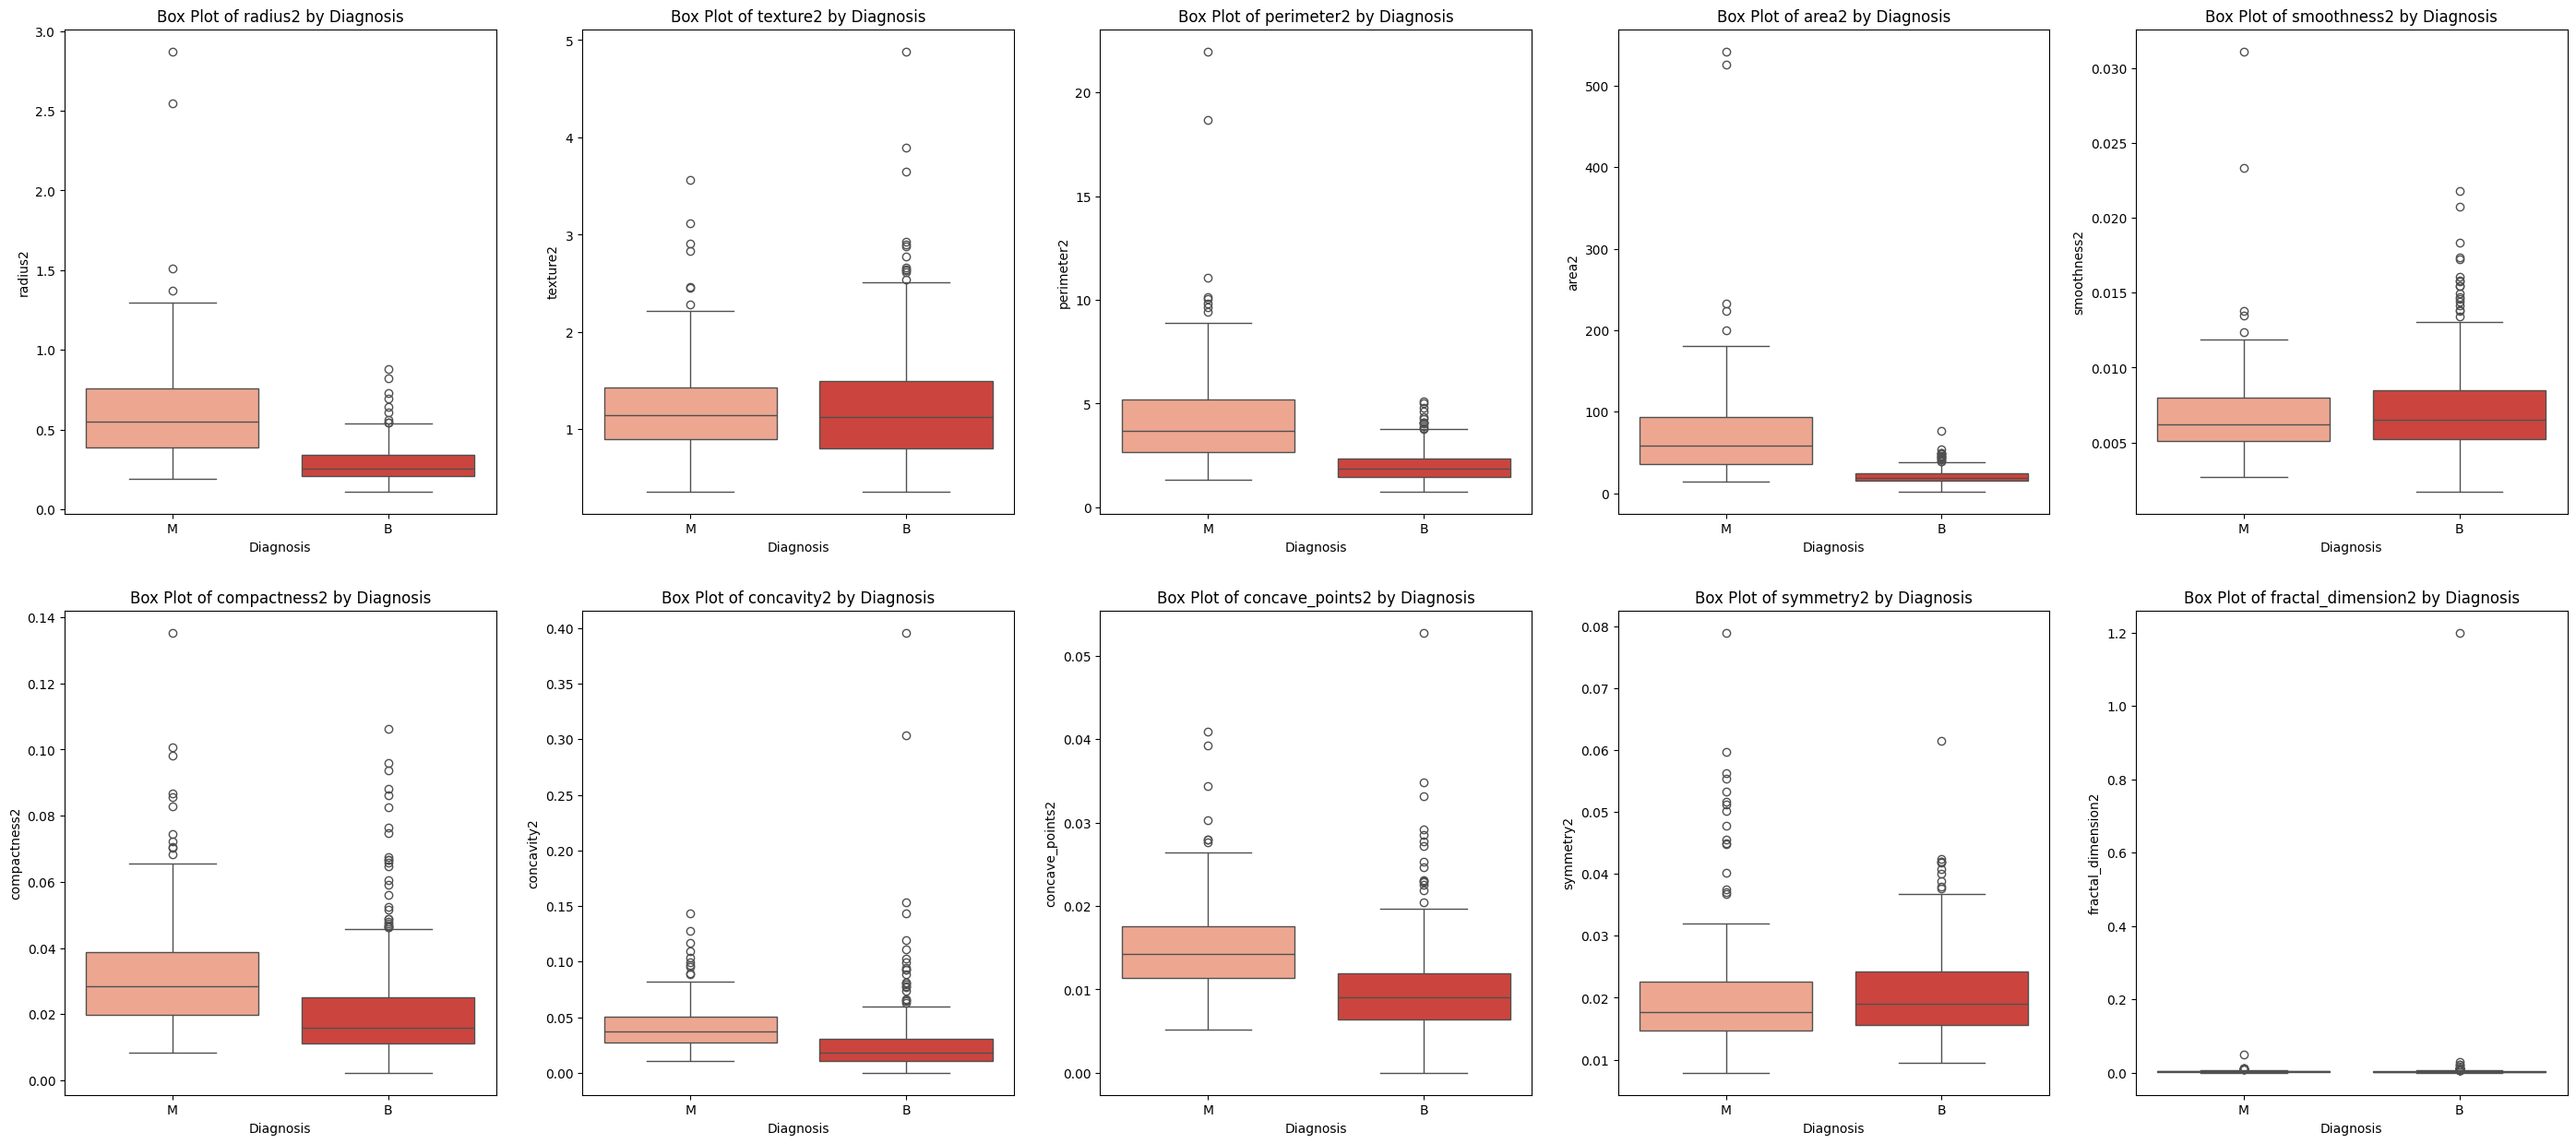

In [238]:
# Learnt from https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8
fig, axes = plt.subplots(2, 5, figsize=(35, 15)) # Creating a subplot of 2 rows and 5 columns
axes = axes.flatten() # converting 2d array to 1d array
for i in range(10):
    sns.boxplot(ax = axes[i], x='Diagnosis', y=col_names[i+12], data=cancer_df , palette="Reds")
    axes[i].set(title = f'Box Plot of {col_names[i+12]} by Diagnosis')


C:\Users\kazia\AppData\Local\Temp\ipykernel_14560\734946645.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax = axes[i], x='Diagnosis', y=col_names[i+22], data=cancer_df , palette="Greens")
C:\Users\kazia\AppData\Local\Temp\ipykernel_14560\734946645.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax = axes[i], x='Diagnosis', y=col_names[i+22], data=cancer_df , palette="Greens")
C:\Users\kazia\AppData\Local\Temp\ipykernel_14560\734946645.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax = axes[i], x='Diagnosis', y=col_names[i+22

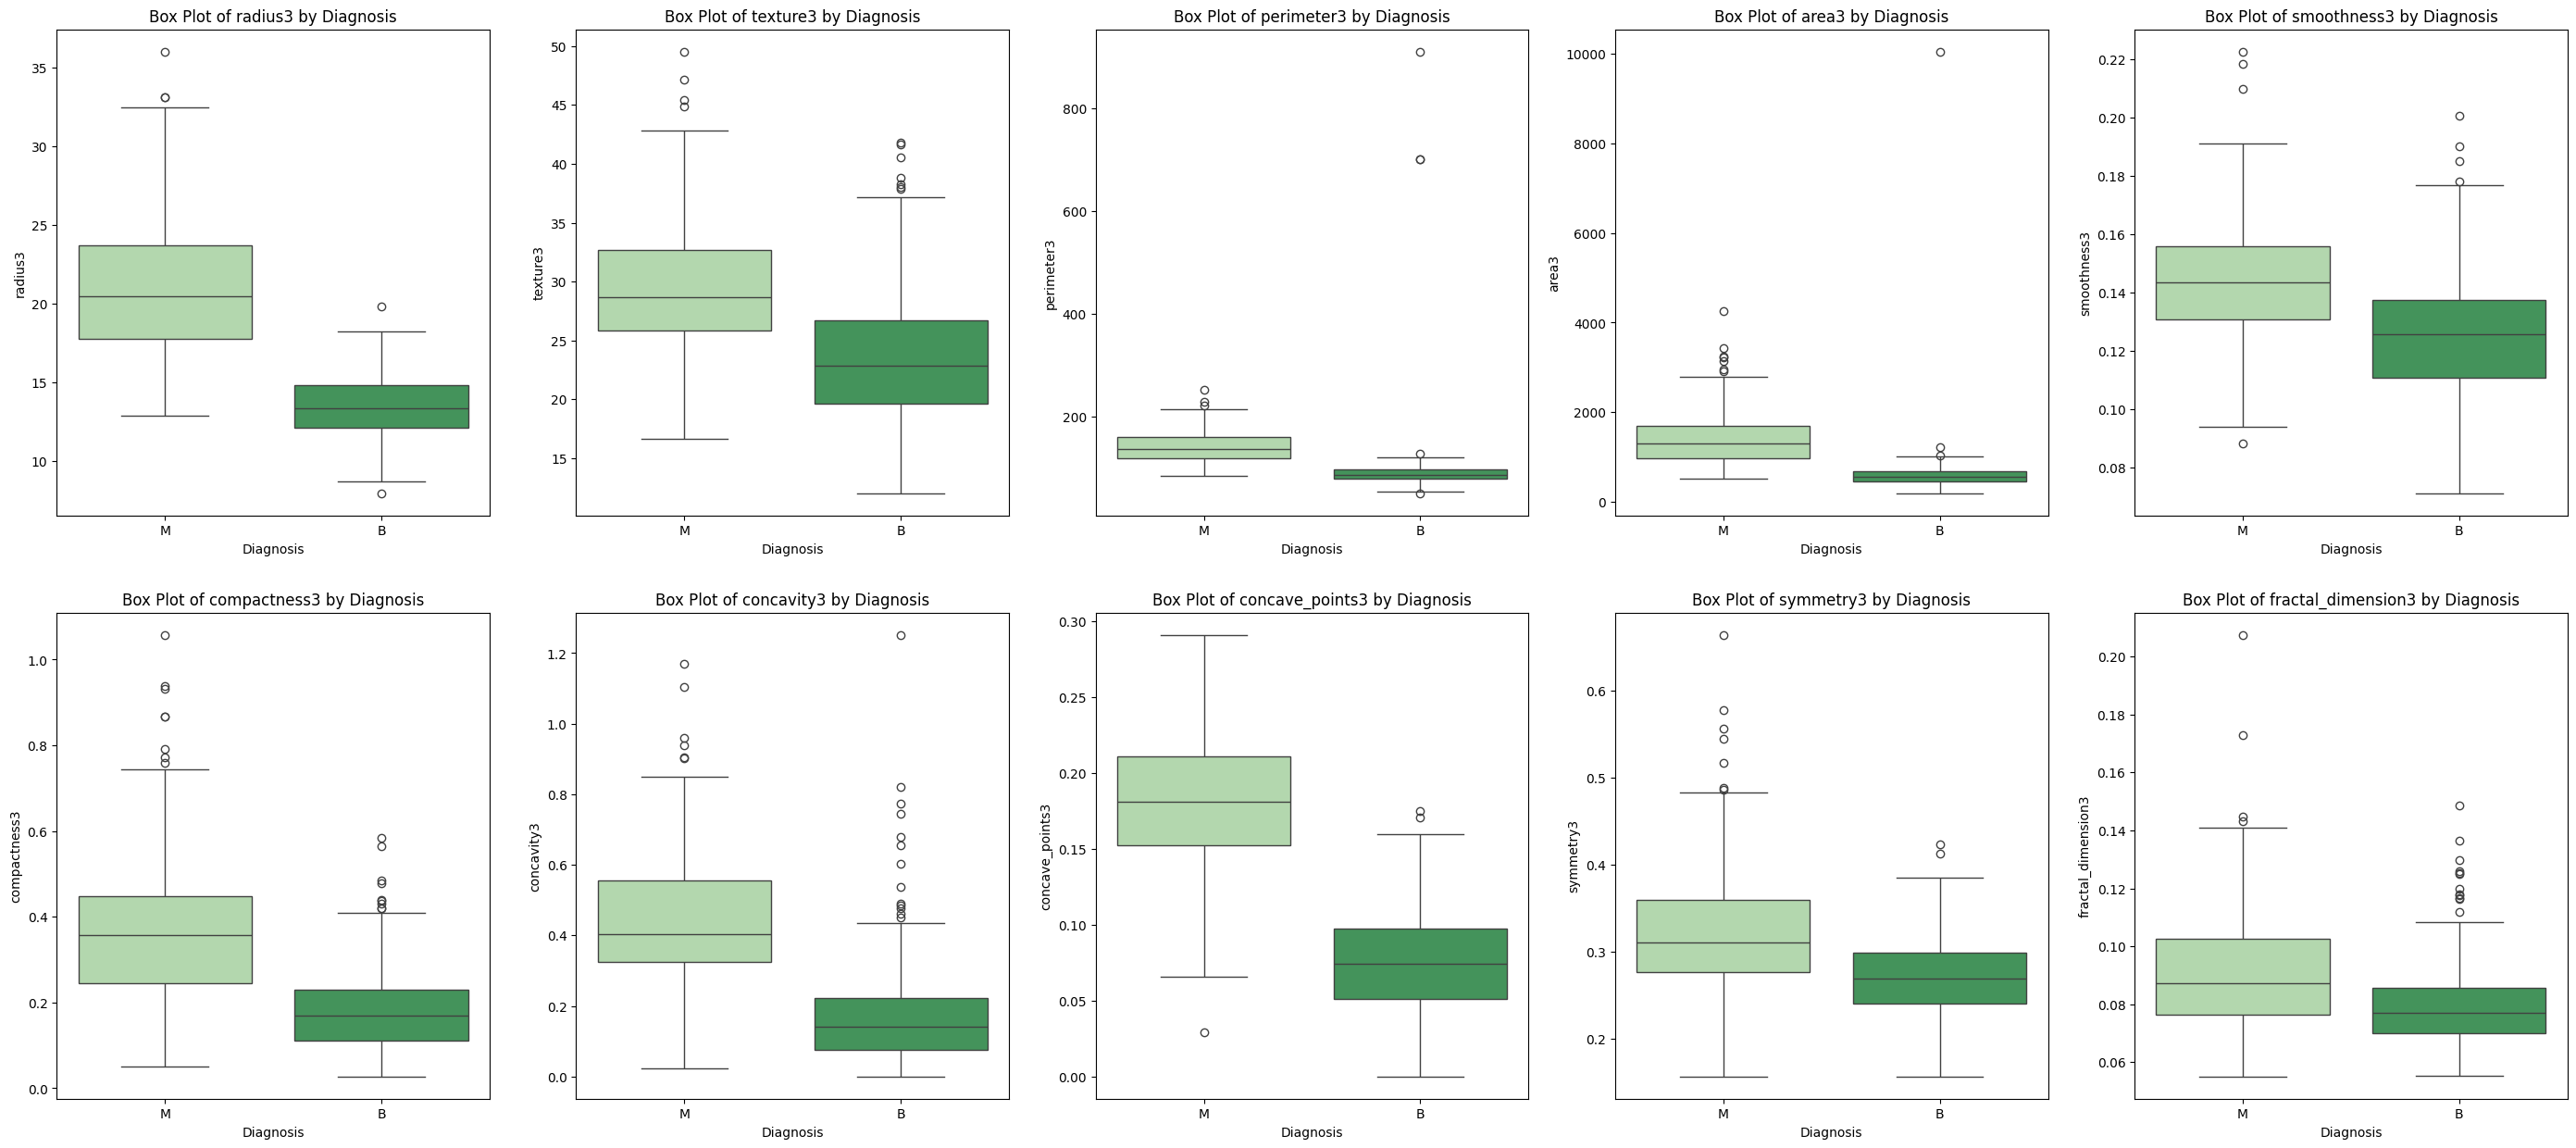

In [239]:
# Learnt from https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8
fig, axes = plt.subplots(2, 5, figsize=(35, 15)) # Creating a subplot of 2 rows and 5 columns
axes = axes.flatten() # converting 2d array to 1d array
for i in range(10):
    sns.boxplot(ax = axes[i], x='Diagnosis', y=col_names[i+22], data=cancer_df , palette="Greens")
    axes[i].set(title = f'Box Plot of {col_names[i+22]} by Diagnosis')


### Data cleaning and feature engineering 


In [240]:
cancer_df.isnull().sum() # checking for missing values

ID                     3
Diagnosis              3
radius1                5
texture1               6
perimeter1             4
area1                  5
smoothness1            3
compactness1           4
concavity1             4
concave_points1        8
symmetry1              3
fractal_dimension1     4
radius2                6
texture2               8
perimeter2             3
area2                  6
smoothness2            6
compactness2           7
concavity2             8
concave_points2        9
symmetry2              8
fractal_dimension2     7
radius3               13
texture3              21
perimeter3             6
area3                  4
smoothness3            9
compactness3           4
concavity3             3
concave_points3        6
symmetry3              4
fractal_dimension3    13
dtype: int64

In [241]:
cancer_df.isnull().sum().sum()

203

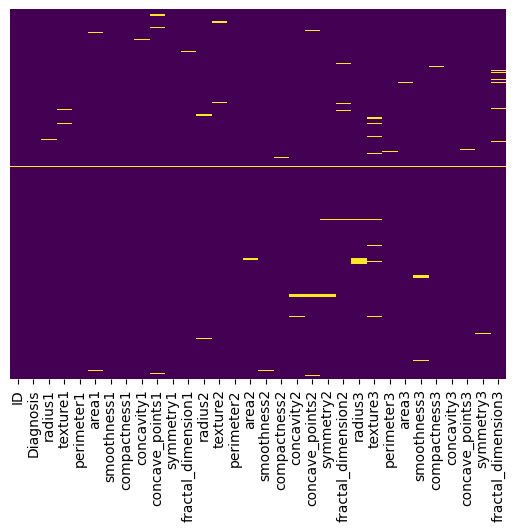

In [242]:
sns.heatmap(cancer_df.isnull(),yticklabels=False,cbar=False,cmap='viridis'); #visualization of where the null values lie


In [243]:
cancer_df.dropna(how='all', inplace=True) #dropping where either row or column have all missing value
cancer_df = cancer_df[cancer_df['Diagnosis'] != '']
cancer_df.isnull().sum()

ID                     0
Diagnosis              0
radius1                2
texture1               3
perimeter1             1
area1                  2
smoothness1            0
compactness1           1
concavity1             1
concave_points1        5
symmetry1              0
fractal_dimension1     1
radius2                3
texture2               5
perimeter2             0
area2                  3
smoothness2            3
compactness2           4
concavity2             5
concave_points2        6
symmetry2              5
fractal_dimension2     4
radius3               10
texture3              18
perimeter3             3
area3                  1
smoothness3            6
compactness3           1
concavity3             0
concave_points3        3
symmetry3              1
fractal_dimension3    10
dtype: int64

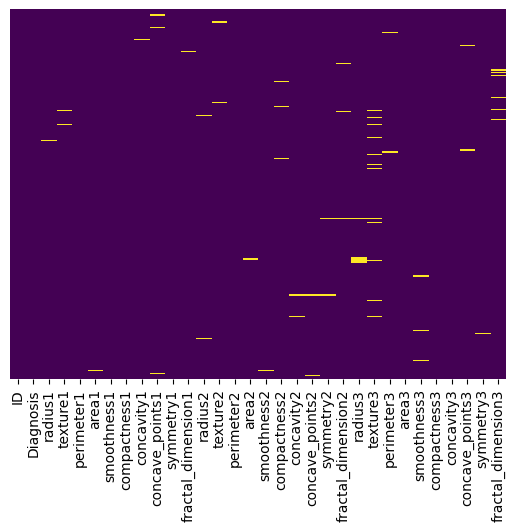

In [244]:
sns.heatmap(cancer_df.isnull(),yticklabels=False,cbar=False,cmap='viridis'); #visualization of where the null values lie
missing_col = ['radius1','texture1','perimeter1','area1','smoothness1','compactness1','concavity1','concave_points1','symmetry1', 'fractal_dimension1',
             'radius2','texture2','perimeter2','area2','smoothness2','compactness2','concavity2','concave_points2','symmetry2', 'fractal_dimension2',
             'radius3','texture3','perimeter3','area3','smoothness3','compactness3','concavity3','concave_points3','symmetry3', 'fractal_dimension3']

In [245]:
def iqr(col): # IQR function
    Q1 = np.percentile(col, 25) #Calculating First Quartile 
    Q3 = np.percentile(col, 75) #Calculating third Quartile 
    IQR = Q3 - Q1 #Calculating Inter quartile Range
    lower_bound = Q1 - 1.5 * IQR  #lower bounds to identify outliers
    upper_bound = Q3 + 1.5 * IQR  #upper bounds to identify outliers

    outliers = (col < lower_bound) | (col > upper_bound) #Identifying the outlier return as boolean

    dno = col[~outliers]# Filtering the outliers

    return dno



In [246]:
# See https://tahera-firdose.medium.com/knn-imputation-an-effective-approach-for-handling-missing-data-5c8bbb45c81a

knn_filler = cancer_df.drop(['ID', 'Diagnosis'], axis=1)

imputer = KNNImputer(n_neighbors=5)
knn_filler_imputed = pd.DataFrame(imputer.fit_transform(knn_filler), columns=knn_filler.columns)

(566, 30)


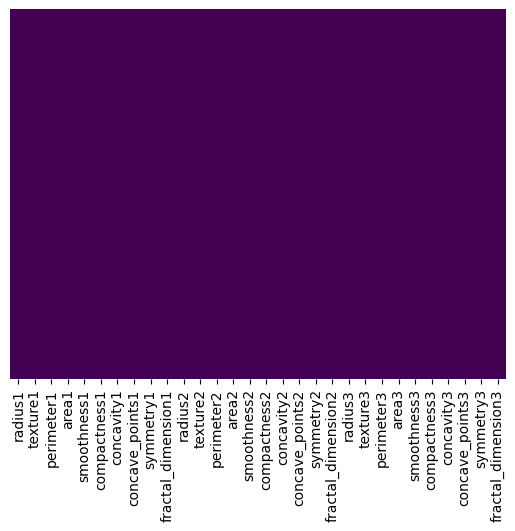

In [247]:
sns.heatmap(knn_filler_imputed.isnull(),yticklabels=False,cbar=False,cmap='viridis');
print(knn_filler_imputed.shape)


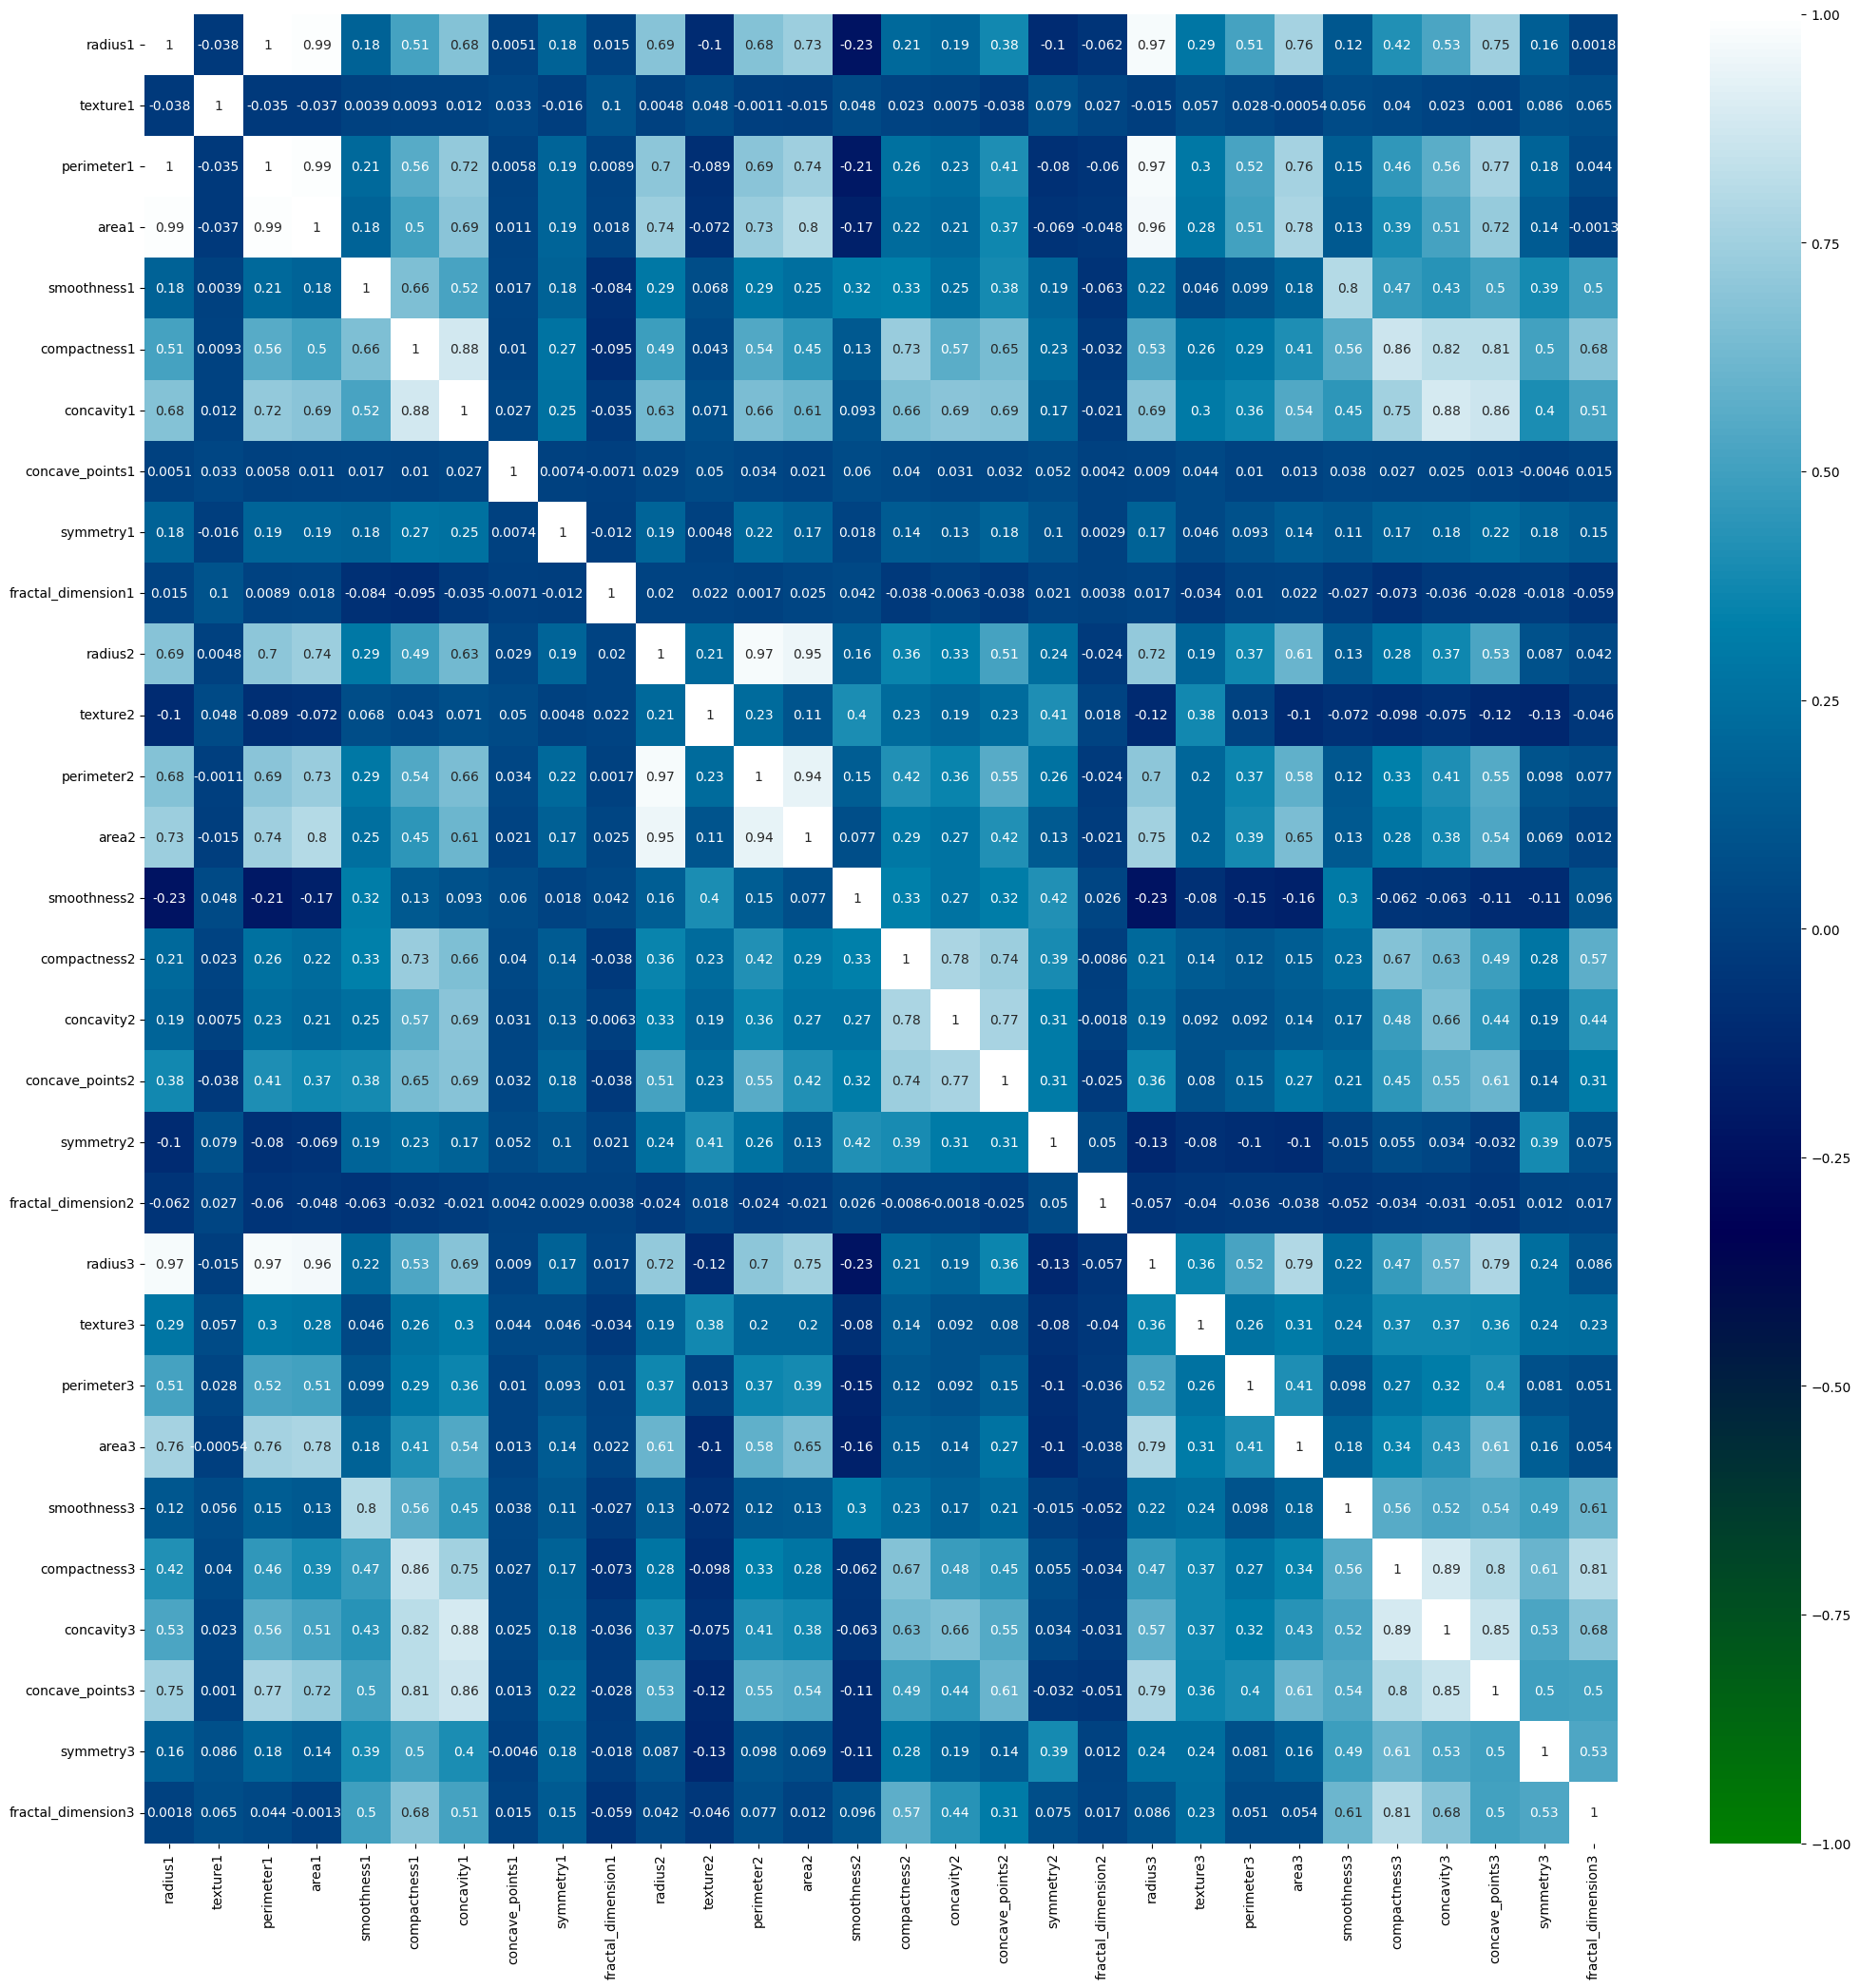

In [248]:
plt.figure(figsize=(25, 25))
sns.heatmap(knn_filler_imputed.corr(), annot=True, cmap='ocean',vmin=-1,vmax=1)
plt.show()

In [249]:
for col_name in missing_col:
    knn_filler_imputed[col_name] = iqr(knn_filler_imputed[col_name])


In [250]:
knn_filler_imputed = pd.DataFrame(imputer.fit_transform(knn_filler_imputed), columns=knn_filler_imputed.columns)

### Model Training

#### KNN Imputing Dataset

(566, 30)


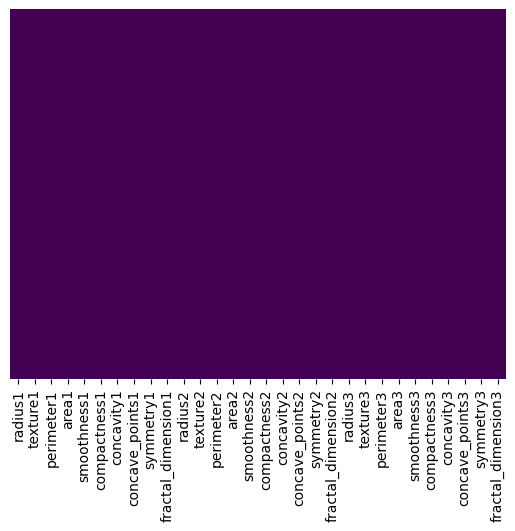

In [251]:
sns.heatmap(knn_filler_imputed.isnull(),yticklabels=False,cbar=False,cmap='viridis');
print(knn_filler_imputed.shape)

#### RandomForrest

In [252]:
X = knn_filler_imputed
y = cancer_df['Diagnosis']

y_encoded = LabelEncoder().fit_transform(y)
#Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
#Scaling the dataset
scaler = StandardScaler() 
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [253]:
n = 0
best_acc = 0
best_depth = 0
best_samples_split = 0
best_samples_leaf = 0
best_rf = None
def hyper_tuning_rf(n_estimators, max_depth_vals, min_samples_split_vals, min_samples_leaf_vals):
    global rfb,n,best_acc, best_depth, best_samples_split, best_samples_leaf, best_rf
    
    for n_estimator in n_estimators:
        for max_depth in max_depth_vals:
            for min_samples_split in min_samples_split_vals:
                for min_samples_leaf in min_samples_leaf_vals:
                    rf = RandomForestClassifier(
                        n_estimators=n_estimator,
                        max_depth=max_depth,
                        min_samples_split=min_samples_split,
                        min_samples_leaf=min_samples_leaf
                    )
                    rf.fit(X_train_scaled, y_train)
                    rf_preds = rf.predict(X_test_scaled)
                    acc = accuracy_score(y_test, rf_preds)
                    if acc > best_acc:
                        n = n_estimator
                        best_acc = acc
                        best_depth = max_depth
                        best_samples_split = min_samples_split
                        best_samples_leaf = min_samples_leaf
                        best_rf = rf

In [254]:
n_estimator = [100,200,300]
max_depth=[5, 10, 15]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
hyper_tuning_rf(n_estimator,max_depth,min_samples_split,min_samples_leaf)
print(f'Accuracy: {best_acc} \nNunmber of trees: {n}\nBest max_depth: {best_depth} \nBest min_samples_split: {best_samples_split} \nBest min_samples_leaf: {best_samples_leaf}')


Accuracy: 0.956140350877193 
Nunmber of trees: 100
Best max_depth: 5 
Best min_samples_split: 5 
Best min_samples_leaf: 4


In [255]:
rfb = best_rf.predict(X_test_scaled)
print(f'Accuracy: {accuracy_score(y_test, rfb)}')
print(confusion_matrix(y_test, rfb))
print(classification_report(y_test, rfb))

Accuracy: 0.956140350877193
[[64  2]
 [ 3 45]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96        66
           1       0.96      0.94      0.95        48

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [256]:
cnf_matrix = confusion_matrix(y_test, rfb)

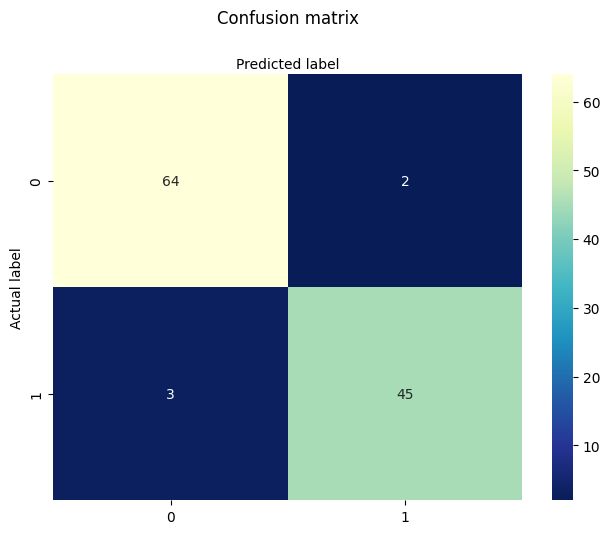

In [257]:
class_names= [0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu_r' ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

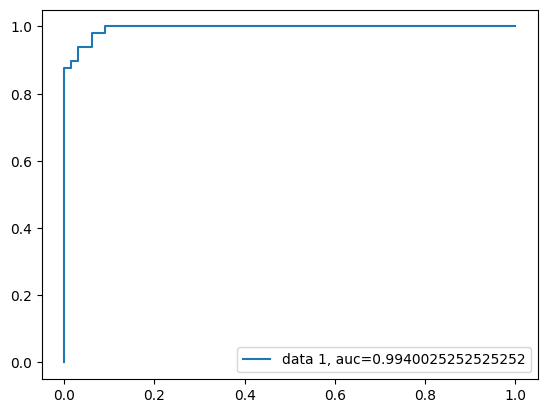

In [258]:
y_pred_proba = best_rf.predict_proba(X_test_scaled)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score (y_test, y_pred_proba)
plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.legend(loc=4) 
plt.show()

#### SVM

In [259]:
best_acc = 0
best_c = 0
best_gamma = 0
best_kernal = 0
best_degree = 0
best_svc = None
def hyper_tuning_svc(C_values, gamma_values, kernel_values,degree_values):
    global best_acc,best_c,best_gamma, best_kernal, best_svc, best_degree
    
    for c in C_values:
        for gamma in gamma_values:
            for kernal in kernel_values:
                if kernal == 'poly':
                    for degree in degree_values:
                        svc = SVC(C=c, gamma=gamma, kernel=kernal, degree = degree, probability=True)
                        svc.fit(X_train_scaled, y_train)
                        svc_preds = svc.predict(X_test_scaled)
                        acc = accuracy_score(y_test, svc_preds)
                        if acc > best_acc:
                            best_acc = acc
                            best_c = c
                            best_gamma = gamma
                            best_kernal = kernal
                            best_degree = degree
                            best_svc =svc
                else:
                    svc = SVC(C=c, gamma=gamma, kernel=kernal, probability=True)
                    svc.fit(X_train_scaled, y_train)
                    svc_preds = svc.predict(X_test_scaled)
                    acc = accuracy_score(y_test, svc_preds)
                    if acc > best_acc:
                        best_acc = acc
                        best_c = c
                        best_gamma = gamma
                        best_kernal = kernal
                        best_svc =svc
                        best_degree = 0
                



In [260]:
C_values = [0.1, 1, 10, 100]
gamma_values = [1, 0.1, 0.01, 0.001]
kernel_values = ['rbf', 'linear', 'poly']
degree_values = [3,4,5,6,7]
hyper_tuning_svc(C_values,gamma_values,kernel_values,degree_values)
if best_degree > 0:
    print(f'Accuracy: {best_acc} \nBest C: {best_c}\nBest gamma: {best_gamma} \nBest Kernal: {best_kernal} \nBest Degree for Poly: {best_degree}')
else:
    print(f'Accuracy: {best_acc} \nBest C: {best_c}\nBest gamma: {best_gamma} \nBest Kernal: {best_kernal} \n')


Accuracy: 0.9736842105263158 
Best C: 0.1
Best gamma: 1 
Best Kernal: linear 



In [261]:
cnf_matrix = confusion_matrix(y_test, best_svc.predict(X_test_scaled))

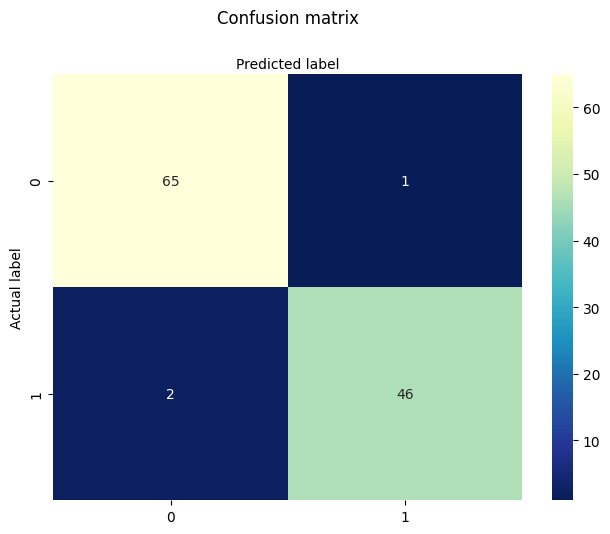

In [262]:
class_names= [0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu_r' ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

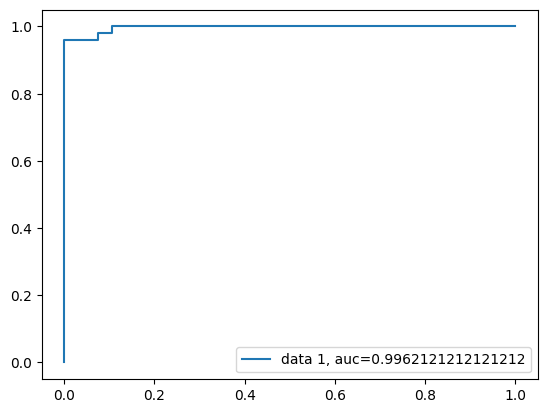

In [263]:
y_pred_proba = best_svc.predict_proba(X_test_scaled)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score (y_test, y_pred_proba)
plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.legend(loc=4) 
plt.show()

#### Decision Tree

In [264]:
best_acc = 0
best_depth = 0
best_samples_split = 0
best_samples_leaf = 0
best_dt = None
def hyper_tuning_dt(max_depth_vals, min_samples_split_vals, min_samples_leaf_vals):
    global best_acc, best_depth , best_samples_split, best_samples_leaf,best_dt
    for max_depth in max_depth_vals:
        for min_samples_split in min_samples_split_vals:
            for min_samples_leaf in min_samples_leaf_vals:
                dt = DecisionTreeClassifier(
                    max_depth=max_depth,
                    min_samples_split=min_samples_split,
                    min_samples_leaf=min_samples_leaf
                )
                dt.fit(X_train_scaled, y_train)
                dt_preds = dt.predict(X_test_scaled)
                acc = accuracy_score(y_test, dt_preds)
                if acc > best_acc:
                    best_acc = acc
                    best_depth = max_depth
                    best_samples_split = min_samples_split
                    best_samples_leaf = min_samples_leaf
                    best_dt = dt 

In [265]:
max_depth=[1, 5, 10, 15]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
hyper_tuning_dt(max_depth,min_samples_split,min_samples_leaf)
print(f'Accuracy: {best_acc} \nBest max_depth: {best_depth} \nBest min_samples_split: {best_samples_split} \nBest min_samples_leaf: {best_samples_leaf}')


Accuracy: 0.9210526315789473 
Best max_depth: 15 
Best min_samples_split: 5 
Best min_samples_leaf: 2


In [266]:
dtb = best_dt.predict(X_test_scaled)
print(f'Accuracy: {accuracy_score(y_test, dtb)}')
print(confusion_matrix(y_test, dtb))
print(classification_report(y_test, dtb))

Accuracy: 0.9210526315789473
[[61  5]
 [ 4 44]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        66
           1       0.90      0.92      0.91        48

    accuracy                           0.92       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



In [267]:
cnf_matrix = confusion_matrix(y_test, dtb)

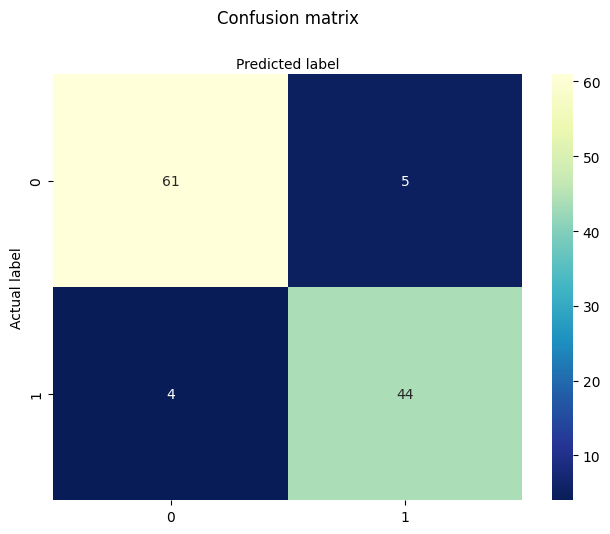

In [268]:
class_names= [0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu_r' ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

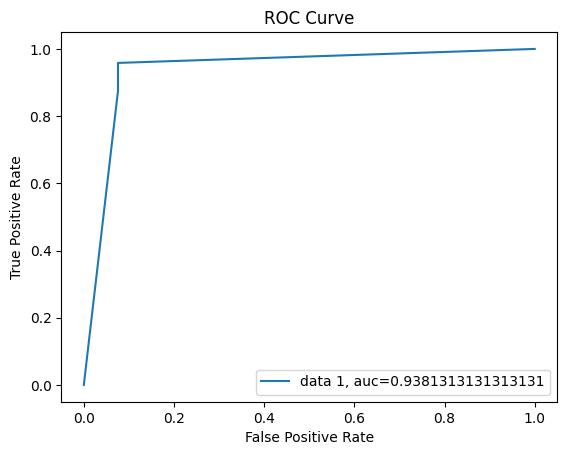

In [269]:
y_pred_proba = best_dt.predict_proba(X_test_scaled)[:, 1]  

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

#### Neural network model (MLP Regressor)

In [270]:
best_layer = 0
best_r2 = 0
best_mean =0
best_itr = 0
best_mlp =None
def hyper_tuning_mlp(layer,iter):
    global best_r2,best_mean,best_layer,best_itr,best_mlp
    for l in layer:
       for i in iter:
            mlp = MLPRegressor(hidden_layer_sizes=(l,200), max_iter=i, activation='relu',solver='adam', random_state=42)
            mlp.fit(X_train_scaled, y_train)
            mlp_preds = mlp.predict(X_test_scaled)
            mse = mean_squared_error(y_test, mlp_preds)
            r2 = r2_score(y_test, mlp_preds)
            if r2 > best_r2:
                best_layer = l
                best_itr = i
                best_mean = mse
                best_r2 = r2
                best_mlp = mlp


In [271]:
hidden_layers = [100,200,300,400,500,600]
itr = [1500,3000,6000,4000,12000,25000]
hyper_tuning_mlp(hidden_layers,itr)
print("Best R2 Score:", best_r2)
print("Corresponding MSE:", best_mean)
print("Best Layer Size:", best_layer)
print("Best Iteration:", best_itr)

Best R2 Score: 0.8383531094489687
Corresponding MSE: 0.03940422816756442
Best Layer Size: 600
Best Iteration: 1500


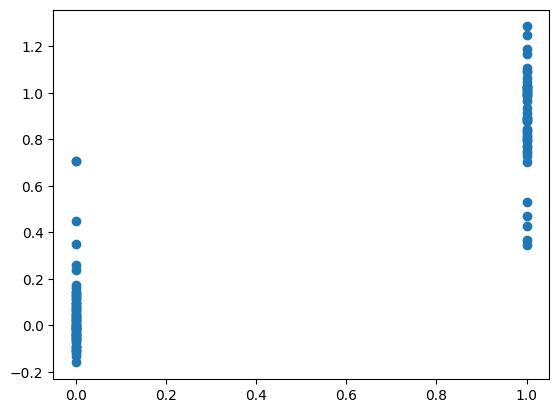

In [272]:
plt.scatter(y_test, best_mlp.predict(X_test_scaled))

c:\Users\kazia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(
c:\Users\kazia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(
c:\Users\kazia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(
c:\Users\kazia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(
c:\Users\kazia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(
c:\Users\kazia\AppData\Lo

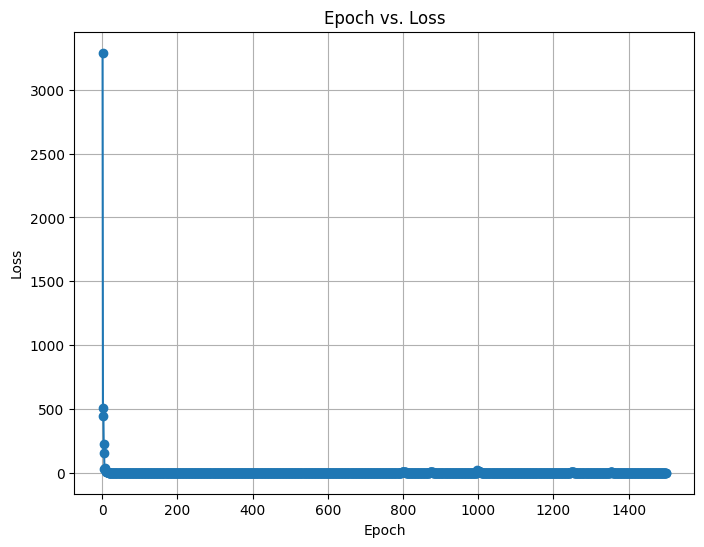

In [273]:
# learn from here https://stackoverflow.com/questions/54749649/how-to-plot-epoch-vs-val-acc-and-epoch-vs-val-loss-graph-in-cnn

epochs = []
losses = []

# Training loop
for epoch in range(1, best_mlp.max_iter + 1):
    best_mlp.partial_fit(X_train, y_train)
    # Calculate loss after each epoch
    loss = best_mlp.loss_
    epochs.append(epoch)
    losses.append(loss)

# Plotting epoch vs. loss graph
plt.figure(figsize=(8, 6))
plt.plot(epochs, losses, marker='o', linestyle='-')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch vs. Loss')
plt.grid(True)
plt.show()